In [109]:
from google.colab import drive 
drive.mount('/content/gdrive') 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [110]:
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
#read the csv file and assign it to a variable
dataset = pd.read_csv('/content/gdrive/My Drive/data.csv')
df = pd.DataFrame(dataset)

#display the basic statistical description of the data
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [112]:
#find the rows that has null values
nullVal = pd.DataFrame(df[df.isna().any(axis=1)])
print("Rows that has null values:")
print(nullVal)

#store the rows indexes in a list
nullValInx = list(nullVal.index.values)

#replace the null values with the respective mean value of the column
df = df.fillna(round(df.mean(),1))

#display the updated rowa]s
upd_val = pd.DataFrame(df,index=nullValInx)
print("\nRows that had null values, after update:")
upd_val

Rows that has null values:
     Duration  Pulse  Maxpulse  Calories
17         45     90       112       NaN
27         60    103       132       NaN
91         45    107       137       NaN
118        60    105       125       NaN
141        60     97       127       NaN

Rows that had null values, after update:


,Duration,Pulse,Maxpulse,Calories
17,45,90,112,375.8
27,60,103,132,375.8
91,45,107,137,375.8
118,60,105,125,375.8
141,60,97,127,375.8


In [113]:
#aggregated data of coulmns, Pulse and Calories
df.agg({'Pulse' : ['max', 'min', 'count', 'mean'], 'Calories' : ['max', 'min', 'count', 'mean']})

,Pulse,Calories
max,159.000000,1860.400000
min,80.000000,50.300000
count,169.000000,169.000000
mean,107.461538,375.790533


In [114]:
#to filter values between 500 and 1000 calories
df_great_500 = df[df['Calories']>=500] #filter rows with calories above 500
df_filter = df_great_500[df_great_500["Calories"]<=1000] #from the above result, filter the rows with calories below 1000
df_filter

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
83,120,100,130,500.0


In [115]:
df_great_500 = df[df['Calories']>500]  #filter rows with calories above 500
df_pulse_100 = df_great_500[df_great_500["Pulse"]<100] #from the above result, filter the rows with pulse below 100
df_pulse_100

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


In [116]:
#create a new dataframe containg all columns except Maxpulse
df_modified = df[["Duration","Pulse","Calories"]]
df_modified

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [117]:
#delete the Maxpulse column from the main frame
del df["Maxpulse"]
df

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [118]:
#convert the datatype of Calories column to int
df["Calories"] = df["Calories"].astype(int)
df

,Duration,Pulse,Calories
0,60,110,409
1,60,117,479
2,60,103,340
3,45,109,282
4,45,117,406
...,...,...,...
164,60,105,290
165,60,110,300
166,60,115,310
167,75,120,320


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


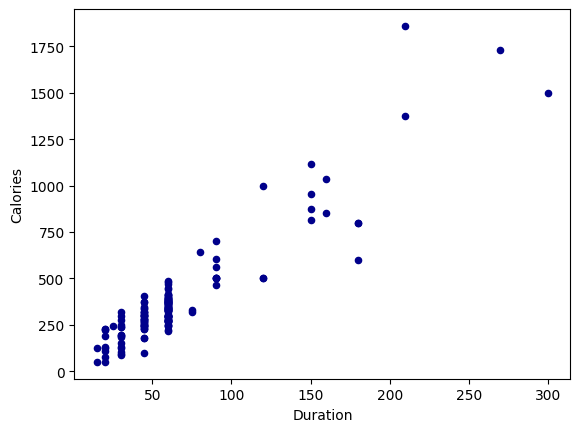

In [119]:
#create a scatter plot for the columns, Duration and Calories
df.plot.scatter(x='Duration', y='Calories', c='DarkBlue')
plt.show()